In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from pydataset import data

<hr style="border-top: 10px groove blueviolet; margin-top: 1px; margin-bottom: 1px"></hr>

### 1.  Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:

In [2]:
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [3]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


- **I'm just doing a little data prep here to get my DataFrame the way I left it in the DataFrames exercises and clean up column names.**

In [4]:
mpg.columns.tolist()

['manufacturer',
 'model',
 'displ',
 'year',
 'cyl',
 'trans',
 'drv',
 'cty',
 'hwy',
 'fl',
 'class']

In [5]:
# Renaming city and highway columns.

mpg.columns = ['manufacturer', 'model', 'displacement', 'year', 'cylinders', 'transmission', 'drive', 'city','highway', 'fuel', 'class']

In [6]:
# Creating average_mileage and mileage_difference columns.

mpg = mpg.assign(mileage_difference = mpg.highway - mpg.city,
                 average_mileage = (mpg.city + mpg.highway) / 2)

mpg.head()

,manufacturer,model,displacement,year,cylinders,transmission,drive,city,highway,fuel,class,mileage_difference,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0


___

#### a. On average, which manufacturer has the best miles per gallon?

- I'll look at this question in a couple of different ways.


- The main takeaway here:  
    - we can use the `.groupby()` method on a column and perform an aggregation on another, or other, column(s).


- I can look at the highest average for `average_mileage` by `manufacturer` as a target.


**- The manufacturer is our dimension and the mean of average_mileage is our metric.**

In [7]:
# Here I perform my groupby and aggregation and sort the values.

mpg.groupby('manufacturer').average_mileage.mean().sort_values(ascending=False).round(2)

manufacturer
honda         28.50
volkswagen    25.07
hyundai       22.75
subaru        22.43
audi          22.03
toyota        21.72
pontiac       21.70
nissan        21.35
chevrolet     18.45
ford          16.68
mercury       15.62
jeep          15.56
dodge         15.54
lincoln       14.17
land rover    14.00
Name: average_mileage, dtype: float64

In [8]:
# Here I perform my groupby and aggregation with .nlargest().

mpg.groupby('manufacturer').average_mileage.mean().nlargest(1, keep='all')

manufacturer
honda    28.5
Name: average_mileage, dtype: float64

In [9]:
# Here I perform my groupby and aggregation with .idxmax().

mpg.groupby('manufacturer').average_mileage.mean().idxmax()

'honda'

___

- No matter if I look at the average city mileage, average highway mileage, or the average average mileage (which I hear is a mathematical sin), Honda is the winner here. 

In [10]:
# I can also perform that aggregation on a list of columns and sort by one.

mpg.groupby('manufacturer')[['city', 'highway', 'average_mileage']].mean().sort_values(by='average_mileage', ascending=False).round(2)


,city,highway,average_mileage
manufacturer,,,
honda,24.44,32.56,28.50
volkswagen,20.93,29.22,25.07
hyundai,18.64,26.86,22.75
subaru,19.29,25.57,22.43
audi,17.61,26.44,22.03
toyota,18.53,24.91,21.72
pontiac,17.00,26.40,21.70
nissan,18.08,24.62,21.35
chevrolet,15.00,21.89,18.45


___

##### Multi-column groupby

- I can `.groupby()` multiple columns and go more granular. 


- What if I wanted to know which manufacturer and model gets the best highway mileage?

In [11]:
multi_models = mpg.groupby(['manufacturer', 'model'])[['highway']].agg(['mean', 'count']).sort_values(by=('highway', 'mean'), ascending=False)
multi_models

highway      
                                          mean count
manufacturer model                                  
toyota       corolla                 34.000000     5
volkswagen   new beetle              32.833333     6
honda        civic                   32.555556     9
volkswagen   jetta                   29.111111     9
nissan       altima                  28.666667     6
audi         a4                      28.285714     7
toyota       camry                   28.285714     7
             camry solara            28.142857     7
hyundai      sonata                  27.714286     7
chevrolet    malibu                  27.600000     5
volkswagen   passat                  27.571429     7
             gti                     27.400000     5
pontiac      grand prix              26.400000     5
subaru       impreza awd             26.000000     8
hyundai      tiburon                 26.000000     7
audi         a4 quattro              25.750000     8
nissan       maxima                  25.333333     3
subaru       forester awd            25.000000     6
chevrolet    corvette                24.800000     5
audi         a6 quattro              24.000000     3
ford         mustang                 23.222222     9
dodge        caravan 2wd             22.363636    11
toyota       toyota tacoma 4wd       19.428571     7
             4runner 4wd             18.833333     6
ford         explorer 4wd            18.000000     6
mercury      mountaineer 4wd         18.000000     4
nissan       pathfinder 4wd          18.000000     4
chevrolet    c1500 suburban 2wd      17.800000     5
jeep         grand cherokee 4wd      17.625000     8
ford         expedition 2wd          17.333333     3
dodge        dakota pickup 4wd       17.000000     9
lincoln      navigator 2wd           17.000000     3
toyota       land cruiser wagon 4wd  16.500000     2
land rover   range rover             16.500000     4
ford         f150 pickup 4wd         16.428571     7
chevrolet    k1500 tahoe 4wd         16.250000     4
dodge        durango 4wd             16.000000     7
             ram 1500 pickup 4wd     15.300000    10

In [12]:
multi_models.columns = ['highway_mean', 'highway_count']

In [13]:
# Which manufacturer and model get the best highway mileage?

multi_models.nlargest(1, 'highway_mean', keep='all')

,,highway_mean,highway_count
manufacturer,model,,
toyota,corolla,34.0,5


___

#### b. How many different manufacturers are there?

In [14]:
# I can use the `.nunique()` function to count the unique values in the column.

mpg.manufacturer.nunique()

15

In [15]:
# The `.describe()` method will tell me that and more, if I want more.

mpg.manufacturer.describe()

count       234
unique       15
top       dodge
freq         37
Name: manufacturer, dtype: object

___

#### c. How many different models are there?

In [16]:
mpg.model.nunique()

38

In [17]:
mpg.model.describe()

count             234
unique             38
top       caravan 2wd
freq               11
Name: model, dtype: object

___

#### d. Do automatic or manual cars have better miles per gallon?

- There are so many ways I can handle this question. 
    - I'm going to create a column, `transmission_category`, that contains `auto` if a car has any type of automatic transmission 
    - and `manual` if a car has any type of manual transmission. 
    
    
- Now, I can use `transmission_category` to group my data by automatic or manual transmission.


**- The `transmission_category` is our dimension, and the mean of city mileage and mean of highway mileage are our metrics.**

In [18]:
# I check the values in the `transmission` column to see what I'm working with.

mpg.transmission.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: transmission, dtype: int64

In [19]:
mpg['transmission_category'] = np.where(mpg.transmission.str.startswith('a'), 'auto', 'manual')
mpg.head()

,manufacturer,model,displacement,year,cylinders,transmission,drive,city,highway,fuel,class,mileage_difference,average_mileage,transmission_category
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0,auto


In [20]:
# The average mileage of manual transmission cars is better per gallon, city or highway.

mpg.groupby('transmission_category')[['city', 'highway']].mean()

,city,highway
transmission_category,,
auto,15.968153,22.292994
manual,18.675325,25.779221


___

In [21]:
# I can decide to make a boolean Series and assign it to my dataframe.

mpg['is_automatic'] = mpg.transmission.str.startswith('a')
mpg.head()

,manufacturer,model,displacement,year,cylinders,transmission,drive,city,highway,fuel,class,mileage_difference,average_mileage,transmission_category,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5,auto,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0,manual,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5,manual,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5,auto,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0,auto,True


In [22]:
# I can group by my boolean column and get the average of city and highway.

mpg.groupby('is_automatic')[['city', 'highway']].mean().sort_values(by='highway', ascending=False)

,city,highway
is_automatic,,
False,18.675325,25.779221
True,15.968153,22.292994


___

<hr style="border-top: 10px groove blueviolet; margin-top: 1px; margin-bottom: 1px"></hr>

### 2. Joining and Merging

- What are my options? 

```python
# default arguments for .merge()

pd.merge(left_df, right_df, how='inner', on=None, left_on=None, right_on=None, 
         left_index=False, right_index=False, sort=True, suffixes='_x', '_y', 
         copy=True, indicator=False, validate=None)
```

- How does changing the default argument of the `how` parameter change my resulting DataFrame?

**Type of merge to be performed.**

`how=left`: preserve rows from left DataFrame and from the right DataFrame, only those rows that have a match, similar to a SQL left outer join.

`how=right`: preserve rows from right DataFrame and from the left DataFrame, only those rows that have a match, similar to a SQL right outer join.

`how=outer`: use the union of rows from both DataFrames, similar to a SQL full outer join.

`how=inner`: use the intersection of rows from both DataFrames; return only rows that are present in both DataFrames, similar to a SQL inner join; preserve the order of the left keys.

In [23]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})

users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [24]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})

roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


___

#### a. What do you think a right join would look like? 

- Jane and Mike are not included because they had NaN values in the foreign key column, `role_id`.


- The `commenter` role is included even through it is not present in the left table in the join.


- A right join uses only the keys from the right DataFrame.
    - If I set `indicator=True`, I can get a good picture of which rows are coming from where.
    - Notice that I only get back rows that are in `both` or `right_only` in a right join.

In [25]:
right_join = pd.merge(users, 
                      roles, 
                      left_on='role_id', 
                      right_on='id', 
                      how='right',
                      indicator=True)
right_join

,id_x,name_x,role_id,id_y,name_y,_merge
0,1.0,bob,1.0,1,admin,both
1,2.0,joe,2.0,2,author,both
2,3.0,sally,3.0,3,reviewer,both
3,4.0,adam,3.0,3,reviewer,both
4,NaN,NaN,NaN,4,commenter,right_only


In [26]:
# I can use method chaining to make my resulting DataFrame how I want.

clean_right = pd.merge(users, 
                    roles, 
                    left_on='role_id', 
                    right_on='id', 
                    how='right').drop(columns='role_id').rename(columns={'id_x': 'id', 
                                                                         'name_x': 'employee',
                                                                         'id_y': 'role_id',
                                                                         'name_y': 'role'}
                                                                )
clean_right

,id,employee,role_id,role
0,1.0,bob,1,admin
1,2.0,joe,2,author
2,3.0,sally,3,reviewer
3,4.0,adam,3,reviewer
4,NaN,NaN,4,commenter


___

#### b. What would an outer join look like? 

- This returns a DataFrame with all of the rows from both tables.


- Again, setting `indicator=True` allows me to see exactly what's happening here.
    - In outer join, I receive rows that are in `both`, `left_only`, and `right_only`.
    - Basically, I get all of the rows from both DataFrames.

In [27]:
pd.merge(users, 
         roles, 
         left_on='role_id', 
         right_on='id', 
         how='outer',
        indicator=True)

,id_x,name_x,role_id,id_y,name_y,_merge
0,1.0,bob,1.0,1.0,admin,both
1,2.0,joe,2.0,2.0,author,both
2,3.0,sally,3.0,3.0,reviewer,both
3,4.0,adam,3.0,3.0,reviewer,both
4,5.0,jane,NaN,NaN,NaN,left_only
5,6.0,mike,NaN,NaN,NaN,left_only
6,NaN,NaN,NaN,4.0,commenter,right_only


In [28]:
pd.merge(users, 
         roles, 
         left_on='role_id', 
         right_on='id', 
         how='outer').drop(columns='role_id').rename(columns={'id_x': 'id', 
                                                            'name_x': 'employee',
                                                            'id_y': 'role_id',
                                                            'name_y': 'role'}
                                                    )

,id,employee,role_id,role
0,1.0,bob,1.0,admin
1,2.0,joe,2.0,author
2,3.0,sally,3.0,reviewer
3,4.0,adam,3.0,reviewer
4,5.0,jane,NaN,NaN
5,6.0,mike,NaN,NaN
6,NaN,NaN,4.0,commenter


___

#### c. What happens if you drop the foreign keys from the dataframes and try to merge them?

- If I drop the foreign key of `role_id`, I have a very confusing situation!


- If I join on `id`, I'm making a big mistake now.

In [29]:
users_drop = users.drop(columns='role_id')
users_drop

,id,name
0,1,bob
1,2,joe
2,3,sally
3,4,adam
4,5,jane
5,6,mike


In [30]:
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [31]:
# The result is not good. Now Adam is a commenter, and that is not true.

pd.merge(users_drop, roles, on='id')

,id,name_x,name_y
0,1,bob,admin
1,2,joe,author
2,3,sally,reviewer
3,4,adam,commenter


In [32]:
# Here is how they should be joined. Adam is a reviewer.

pd.merge(users, roles, left_on='role_id', right_on='id')

,id_x,name_x,role_id,id_y,name_y
0,1,bob,1.0,1,admin
1,2,joe,2.0,2,author
2,3,sally,3.0,3,reviewer
3,4,adam,3.0,3,reviewer


<hr style="border-top: 10px groove blueviolet; margin-top: 1px; margin-bottom: 1px"></hr>

### 3. Getting data from SQL databases

___

#### a. Create a function named get_db_url. 

- It should accept a username, hostname, password, and database name and return a url formatted like in the examples in this lesson.

In [33]:
from env import host, password, user

In [34]:
def get_db_url(db, user=user, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

___

#### b. Use your function to obtain a connection to the employees database.

```python
df = pd.read_sql(sql_query, db_url)
```

- I'm bringing in a lot of data, so this query could take a bit to run.


- After reading in the db the first time, I'm going to save the DataFrame to a csv file to read it in faster the next times I need it. *(After restarting my kernel several times and waiting for this query to return my data, I got over it and made the csv file.)*

In [35]:
sql_query = 'SELECT * FROM employees'

In [36]:
# employees = pd.read_sql(sql_query, get_db_url('employees'))

In [37]:
# employees.to_csv('employees.csv')

In [38]:
# I had to add a file path to my file name bc of where I have my file.

employees = pd.read_csv('data/employees.csv', index_col=0)
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


___

#### c. Once you have successfully run a query:

- Intentionally make a typo in the database url. What kind of error message do you see?

    - There is no database named `titles`, so I get the following error.
    - I commented out this code after walkthrough to avoid displaying huge error.
    - Basically, read your error messages, and they will tell you if your error is with your database or your SQL query.

In [39]:
# sql_query = 'SELECT * FROM titles'

# titles = pd.read_sql(sql_query, get_db_url('titles'))
# titles.head()

- Intentionally make an error in your SQL query. What does the error message look like?

In [40]:
# sql_query = 'SELECT # FORM titles'

# titles = pd.read_sql(sql_query, get_db_url('employees'))
# titles.head()

___

#### d. Read the employees and titles tables into two separate dataframes.

In [41]:
sql_query = 'SELECT * FROM titles'

# titles = pd.read_sql(sql_query, get_db_url('employees'))
# titles.head()

In [42]:
# titles.to_csv('titles.csv')

In [43]:
# Read in and peek at title DataFrame.

titles = pd.read_csv('data/titles.csv', index_col=0)
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [44]:
# Check out my data types and non-null count.

titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443308 entries, 0 to 443307
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   emp_no     443308 non-null  int64 
 1   title      443308 non-null  object
 2   from_date  443308 non-null  object
 3   to_date    443308 non-null  object
dtypes: int64(1), object(3)
memory usage: 16.9+ MB


In [45]:
# Peek at employees DataFrame

employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [46]:
# Check out my data types and non-null count.

employees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300024 entries, 0 to 300023
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      300024 non-null  int64 
 1   birth_date  300024 non-null  object
 2   first_name  300024 non-null  object
 3   last_name   300024 non-null  object
 4   gender      300024 non-null  object
 5   hire_date   300024 non-null  object
dtypes: int64(1), object(5)
memory usage: 16.0+ MB


___

#### e. Visualize the number of employees with each title.

- I am going to solve this for titles currently held by employees. If you didn't filter for titles currently held, that's fine, too.


- The goal here is that you come up with a strategy to visualize this information and code it.


**- Our dimension is title, and our metric is the count of employees with each title.**

In [47]:
titles.head(1)

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01


In [48]:
titles.shape

(443308, 4)

In [49]:
titles.to_date.min()

'1985-03-01'

In [50]:
titles.to_date.max()

'9999-01-01'

In [51]:
# Create a boolean Series to filter for current titles held.

current_bool = titles.to_date == titles.to_date.max()
current_bool.head()

0     True
1     True
2     True
3    False
4     True
Name: to_date, dtype: bool

In [52]:
# Filter my Series and assign to current_employees_titles.

current_employee_titles = titles[current_bool]
current_employee_titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
5,10005,Senior Staff,1996-09-12,9999-01-01


In [53]:
# I'm down to 240_124 rows from 443_308 rows before.

current_employee_titles.shape

(240124, 4)

In [54]:
# Our dimension is title and our metric is the count of employees, emp_no.

current_employee_titles.groupby('title').emp_no.count()

title
Assistant Engineer     3588
Engineer              30983
Manager                   9
Senior Engineer       85939
Senior Staff          82024
Staff                 25526
Technique Leader      12055
Name: emp_no, dtype: int64

In [55]:
# Use value_counts on the title column to get the frequency for each title. 
# My index values are the titles, values the count of employees with that title.

current_title_values = current_employee_titles.title.value_counts()
current_title_values

Senior Engineer       85939
Senior Staff          82024
Engineer              30983
Staff                 25526
Technique Leader      12055
Assistant Engineer     3588
Manager                   9
Name: title, dtype: int64

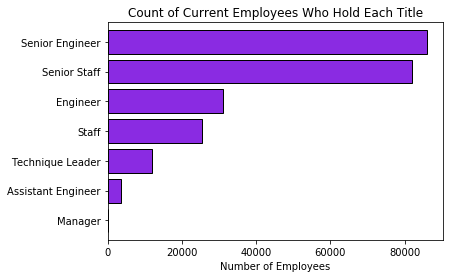

In [56]:
# This shows the number of current employees who hold each title.

current_title_values.plot.barh(color='blueviolet', 
                               ec='black', 
                               width=.8)

plt.title('Count of Current Employees Who Hold Each Title')
plt.xlabel('Number of Employees')

# Reverse order of y-axis for horizontal bar chart
plt.gca().invert_yaxis()

plt.show()

___

#### f. Join the employees and titles dataframes together.
```python
pd.merge(left_df, right_df, how='inner', on=None, left_on=None, right_on=None, 
         left_index=False, right_index=False, sort=True, suffixes='_x', '_y', 
         copy=True, indicator=False, validate=None)
```

In [57]:
employees.shape

(300024, 6)

In [58]:
titles.shape

(443308, 4)

In [59]:
# Merge the DataFrames into all_emp_titles.

all_emp_titles = pd.merge(employees, titles, on='emp_no')

In [60]:
# Peek at DataFrame.

all_emp_titles.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01


In [61]:
all_emp_titles.shape

(443308, 9)

In [62]:
all_emp_titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443308 entries, 0 to 443307
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      443308 non-null  int64 
 1   birth_date  443308 non-null  object
 2   first_name  443308 non-null  object
 3   last_name   443308 non-null  object
 4   gender      443308 non-null  object
 5   hire_date   443308 non-null  object
 6   title       443308 non-null  object
 7   from_date   443308 non-null  object
 8   to_date     443308 non-null  object
dtypes: int64(1), object(8)
memory usage: 33.8+ MB


___

#### g. Visualize how frequently employees change titles.

- As always, there are different way to approach and code this. This is my take.


- **emp_no is our dimension and a count of titles, or really of rows, is our metric.**


- If the frequency of emp_no == 1, then the employee has only ever held 1 title, which means that employee has never changed titles.


- If the frequency of emp_no == 2, then the employee has held 2 titles, which means that employee has changed titles 1 time.


- If the frequency of emp_no == 3, then the employee has held 3 titles. You know the drill.

In [63]:
# emp_no is our dimension and count of title is our metric.

all_emp_titles.groupby('emp_no').title.count().sample(10)

emp_no
252604    1
255527    1
84367     1
282292    1
84586     1
227559    1
289510    1
420315    2
478262    1
86063     2
Name: title, dtype: int64

In [64]:
# Now let's get a count of the values above; we can use value_counts()

all_emp_titles.groupby('emp_no').title.count().value_counts()

1    159754
2    137256
3      3014
Name: title, dtype: int64

- **I can also get to this same point using a value_counts on emp_no and a value_counts on the resulting Series.**

In [65]:
# Get the frequency each emp_no appears in the df. Save to a Series called changes.

changes = all_emp_titles.emp_no.value_counts()
changes.sample(5)

441558    1
201728    1
108236    1
254252    2
44500     2
Name: emp_no, dtype: int64

In [66]:
# Now, I can do a value_counts on changes to get a count of 1s, 2s, 3s.

changes.value_counts()

1    159754
2    137256
3      3014
Name: emp_no, dtype: int64

- **Do you see how value_counts() is basically like a groupby with a count()?**


- Let's plot this!

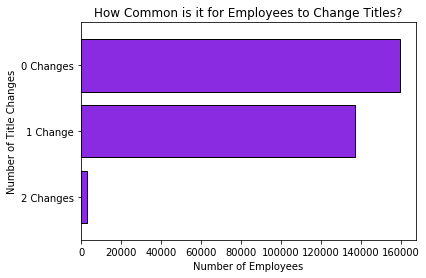

In [67]:
# Plot changes.value_counts() from above.
# 0 changes == 1 title 
# 1 change  == 2 titles 
# 2 changes == 3 titles

changes.value_counts().plot(kind='barh', 
                            color='blueviolet', 
                            ec='black', 
                            width=.8)

plt.title('How Common is it for Employees to Change Titles?')
plt.xlabel('Number of Employees')
plt.ylabel('Number of Title Changes')
plt.yticks(ticks=[0,1,2], labels=['0 Changes', '1 Change', '2 Changes'])

# reorder y-axis of horizontal bar chart
plt.gca().invert_yaxis()

plt.show()

___

#### h. For each title, find the hire date of the employee that was hired most recently with that title.

- **Title is our dimension, and the max of the hire dates, hire_date.max() is our metric.**

In [68]:
all_emp_titles.groupby('title').hire_date.max()

title
Assistant Engineer    1999-12-24
Engineer              2000-01-28
Manager               1992-02-05
Senior Engineer       2000-01-01
Senior Staff          2000-01-13
Staff                 2000-01-12
Technique Leader      1999-12-31
Name: hire_date, dtype: object

___

In [69]:
# Using .max() on a string returns the maximum alphabetical character from the string.

x = pd.Series(['John', 'Faith', 'Ryan'])
x.max()

'Ryan'

In [70]:
# It works on these strings, too.

y = pd.Series(['1999-12-24', '1999-12-31'])
y.max()

'1999-12-31'

#### i. Write the code necessary to create a cross tabulation of the number of titles by department.

<div class="alert alert-block alert-info"><b>Hint:</b> This will involve a combination of SQL and python/pandas code.</div>


In [71]:
dept_title_query = '''

                    SELECT t.emp_no, 
                    t.title, 
                    t.from_date, 
                    t.to_date, 
                    d.dept_name 
                    FROM departments AS d 
                    JOIN dept_emp AS de USING(dept_no) 
                    JOIN titles AS t USING(emp_no);

                    '''

In [72]:
# Code that originally read in my data from the database

# dept_titles = pd.read_sql(dept_title_query, get_db_url('employees'))

In [73]:
# Code that wrote my data to a csv file for faster access.

# dept_titles.to_csv('dept_titles.csv')

In [74]:
# Read in data from a CSV file instead of repeatedly hitting database.

dept_titles = pd.read_csv('data/dept_titles.csv', index_col=0)
dept_titles.head()

,emp_no,title,from_date,to_date,dept_name
0,10011,Staff,1990-01-22,1996-11-09,Customer Service
1,10038,Senior Staff,1996-09-20,9999-01-01,Customer Service
2,10038,Staff,1989-09-20,1996-09-20,Customer Service
3,10049,Senior Staff,2000-05-04,9999-01-01,Customer Service
4,10049,Staff,1992-05-04,2000-05-04,Customer Service


In [75]:
dept_titles.shape

(489903, 5)

In [76]:
# Create a frequency table of titles by department

all_titles_crosstab = pd.crosstab(dept_titles.dept_name, dept_titles.title)
all_titles_crosstab

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,298,2362,4,2027,13925,16150,309
Development,7769,58135,2,49326,1247,1424,7683
Finance,0,0,2,0,12139,13929,0
Human Resources,0,0,2,0,12274,14342,0
Marketing,0,0,2,0,13940,16196,0
Production,6445,49649,4,42205,1270,1478,6557
Quality Management,1831,13852,4,11864,0,0,1795
Research,378,2986,2,2570,11637,13495,393
Sales,0,0,2,0,36191,41808,0


___

In [77]:
# Create a subset of only titles currently held by employees

current_titles = dept_titles[dept_titles.to_date == dept_titles.to_date.max()]
current_titles.head(1)

,emp_no,title,from_date,to_date,dept_name
1,10038,Senior Staff,1996-09-20,9999-01-01,Customer Service


In [78]:
current_titles.shape

(265332, 5)

In [79]:
# Create a frequency table of titles by department

current_titles_crosstab = pd.crosstab(current_titles.dept_name, current_titles.title)
current_titles_crosstab

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,68,627,1,1790,12349,3902,241
Development,1833,15677,1,43364,1085,315,6117
Finance,0,0,1,0,10650,3199,0
Human Resources,0,0,1,0,10843,3416,0
Marketing,0,0,1,0,12371,3880,0
Production,1542,13325,1,37156,1123,349,5210
Quality Management,433,3744,1,10390,0,0,1422
Research,77,830,1,2250,10219,3206,321
Sales,0,0,1,0,32032,9967,0


##### **Maybe you just want to find the max number in each row (department name) quickly.**

In [80]:
current_titles_crosstab.style.highlight_max(axis=1)

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,68,627,1,1790,12349,3902,241
Development,1833,15677,1,43364,1085,315,6117
Finance,0,0,1,0,10650,3199,0
Human Resources,0,0,1,0,10843,3416,0
Marketing,0,0,1,0,12371,3880,0
Production,1542,13325,1,37156,1123,349,5210
Quality Management,433,3744,1,10390,0,0,1422
Research,77,830,1,2250,10219,3206,321
Sales,0,0,1,0,32032,9967,0


<hr style="border-top: 10px groove blueviolet; margin-top: 1px; margin-bottom: 1px"></hr>

### 4. Use your get_db_url function to help you explore the data from the chipotle database. Use the data to answer the following questions:

In [81]:
chipotle_sql_query = '''
                     SELECT *
                     FROM orders;
                     '''

In [82]:
orders = pd.read_sql(chipotle_sql_query, get_db_url('chipotle'))
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [83]:
orders.shape

(4622, 6)

In [84]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  4622 non-null   int64 
 1   order_id            4622 non-null   int64 
 2   quantity            4622 non-null   int64 
 3   item_name           4622 non-null   object
 4   choice_description  4622 non-null   object
 5   item_price          4622 non-null   object
dtypes: int64(3), object(3)
memory usage: 216.8+ KB


___

#### a. What is the total price for each order?

- **Order, `order_id`, is our dimension, and the total price, `item_price.sum()` is our metric.**


- `item_price` is an object, so before I can treat it like a float, I have to clean it up.

In [85]:
# Reassign my cleanup to item_price in my df.

orders['item_price'] = orders.item_price.str.replace('$', '').astype(float)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4622 non-null   int64  
 1   order_id            4622 non-null   int64  
 2   quantity            4622 non-null   int64  
 3   item_name           4622 non-null   object 
 4   choice_description  4622 non-null   object 
 5   item_price          4622 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 216.8+ KB


In [86]:
order_totals = orders.groupby('order_id').item_price.sum()
order_totals.sample(10)

order_id
1113    20.00
535     24.40
1345    18.50
1757    14.70
203     12.75
1788    14.65
420     15.70
415     13.70
1333    12.15
1457    12.40
Name: item_price, dtype: float64

___

#### b. What are the most popular 3 items?

- **Items, `item_name`, is our dimension, and the total number ordered, `quantity.sum()` is our metric.**


- Basically, which three items are ordered the most.**

In [87]:
top_three = orders.groupby('item_name').quantity.sum().sort_values(ascending=False).head(3)
top_three

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Name: quantity, dtype: int64

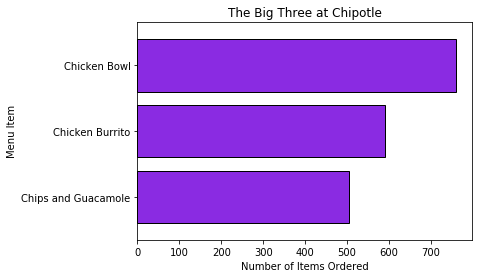

In [88]:
top_three.plot(kind='barh',
             color='blueviolet', 
             ec='black', 
             width=.8)

plt.title('The Big Three at Chipotle')
plt.xlabel('Number of Items Ordered')
plt.ylabel('Menu Item')

# reorder y-axis of horizontal bar chart
plt.gca().invert_yaxis()

plt.show()

___

#### c. Which item has produced the most revenue?

- **Items, `item_name`, is our dimension, and a total of price, `item_price`.sum(), is our metric.**


- With a little investigating, we see that `item_price` is really like a calulation of the quantity of an item in an order times the item's price. This confused me at first, so make sure to get to know your data a little before you dig in.

In [89]:
orders.sample(5)

,id,order_id,quantity,item_name,choice_description,item_price
2513,2514,999,2,Canned Soft Drink,[Sprite],2.50
524,525,219,1,Steak Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Pinto Beans, Rice, Cheese, Sour Cream, Lettuce]]",8.99
3358,3359,1347,1,Chips and Tomatillo-Red Chili Salsa,nan,2.39
4209,4210,1679,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables, Rice, Black Beans, Sour Cream, Lettuce]]",8.75
758,759,312,1,Chips,nan,2.15


In [90]:
# I can return the item(s) with the highest revenue using .nlargest().

orders.groupby('item_name').item_price.sum().nlargest(1, keep='all')

item_name
Chicken Bowl    7342.73
Name: item_price, dtype: float64

In [91]:
# This way I get just the item name with the highest revenue.

orders.groupby('item_name').item_price.sum().idxmax()

'Chicken Bowl'

In [92]:
# I could sort my values and return the top ones using .head() if I wanted.

orders.groupby('item_name').item_price.sum().sort_values(ascending=False).head(1)

item_name
Chicken Bowl    7342.73
Name: item_price, dtype: float64